In [9]:
from sklearn import datasets
import pandas as pd
import numpy as np
iris = datasets.load_iris()

labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data = pd.DataFrame(iris.data)
data.columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']
data = pd.concat([data, labels], axis=1)

data.head()

,Sepal length,Sepal width,Petal length,Petal width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
feature = data[['Sepal length', 'Sepal width', 'Petal length', 'Petal width']]
feature.head()

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# create model and prediction
model = DBSCAN(eps=0.3, min_samples=6)
predict = pd.DataFrame(model.fit_predict(feature))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([feature, predict], axis=1)

print(r)

     Sepal length  Sepal width  Petal length  Petal width  predict
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3       -1
146           6.3          2.5           5.0          1.9       -1
147           6.5          3.0           5.2          2.0       -1
148           6.2          3.4           5.4          2.3       -1
149           5.9          3.0           5.1          1.8       -1

[150 rows x 5 columns]


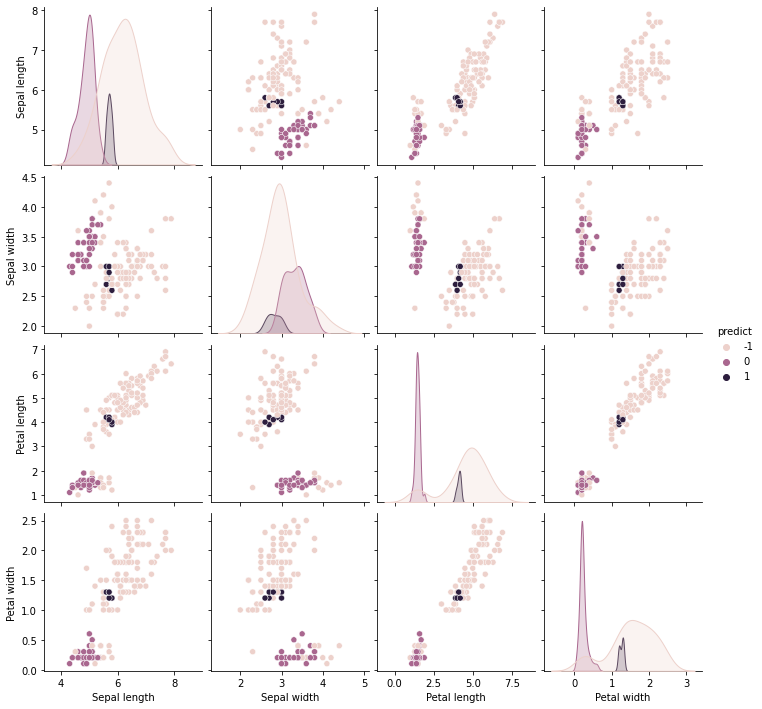

In [4]:
# pairplot with Seaborn
sns.pairplot(r, hue='predict')
plt.show()

C:\Users\82109\AppData\Local\Temp/ipykernel_16380/1859841153.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)


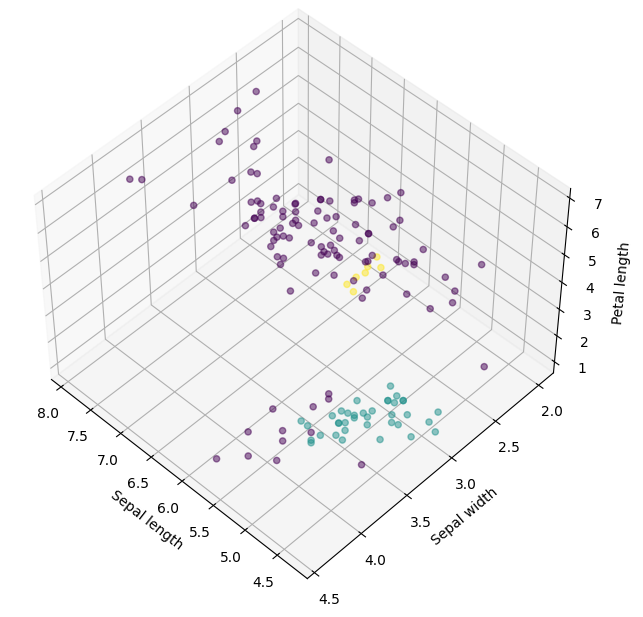

In [5]:
from mpl_toolkits.mplot3d import Axes3D
# scatter plot
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(r['Sepal length'], r['Sepal width'], r['Petal length'], c=r['predict'], alpha=0.5)
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')
plt.show()

#### Evaluate model with Cross tabuliazation

In [6]:
ct = pd.crosstab(data['labels'], r['predict'])
print(ct)

predict  -1   0   1
labels             
0        13  37   0
1        43   0   7
2        50   0   0


- -1은 노이즈에 속하는 군집으로 위 iris 데이터 셋은 DBSCAN에서 0과 1 두 개의 군집으로 군집화 됐다.

#### standarize value

In [7]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

scaler = StandardScaler()
model = DBSCAN(min_samples=6)
pipeline = make_pipeline(scaler, model)
predict = pd.DataFrame(pipeline.fit_predict(feature))
predict.columns = ['predict']

# concatenate labels to df as a new column
r = pd.concat([feature, predict], axis=1)

ct = pd.crosstab(data['labels'], r['predict'])
print(ct)

predict  -1   0   1   2   3
labels                     
0         7  43   0   0   0
1        13   0  31   6   0
2        22   0  10   0  18


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as data
%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's':80, 'linewidths':0}
plt.rcParams["figure.figsize"] = [9,7]
import hdbscan

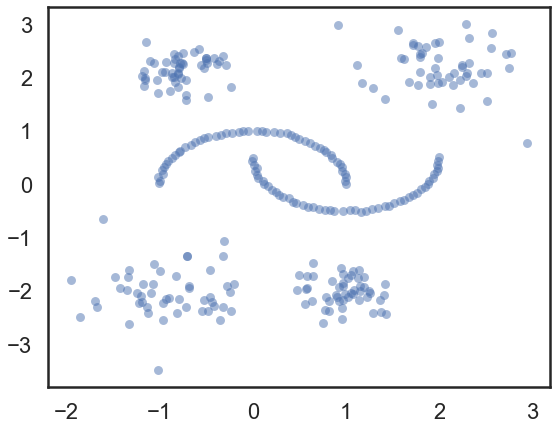

In [24]:
num = 100
# 초승달 모양 클러스터 두 개 형상의 데이터를 생성
moons, _ = data.make_moons(n_samples=num, noise=0.01)
# 등방성 가우시안 정규분포를 이용해 가상 데이터를 생성
blobs, _ = data.make_blobs(n_samples=num, centers=[(-0.75, 2.25), (1.0,-2.0)], cluster_std=0.25) 
blobs2, _ = data.make_blobs(n_samples=num, centers=[(2,2.25), (-1, -2.0)], cluster_std=0.4)
test_data = np.vstack([moons, blobs, blobs2])
plt.scatter(test_data.T[0], test_data.T[1], color='b', **plot_kwds)
plt.show()

- 데이터의 dense가 각기 달라, 반원의 기준의 데이터에 맞추면 타원형데이터는 모두 noise가 되거나 잘못된 클러스터에 속하게 된다.

#### HDBSCAN 적합

In [26]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
clusterer.fit(test_data)

HDBSCAN(gen_min_span_tree=True)

1. Transform the space according to the density/sparsity.
2. Build the minimum spanning tree of the distance weighted graph.
3. Construct a cluster hierarchy of connected components.
4. Condense the cluster hierarchy based on minimum cluster size.
5. Extract the stable clusters from the condensed tree.

1. distance를 robust하게 만듬
    - mutual reachability를 통해 distance의 robustness를 늘리고, 더 효율적인 clustering을 가능하게 한다
2. mutual reachability를 이용하여 각 데이터들간의 거리를 구해 이를 이은 graph를 그림

<AxesSubplot:>

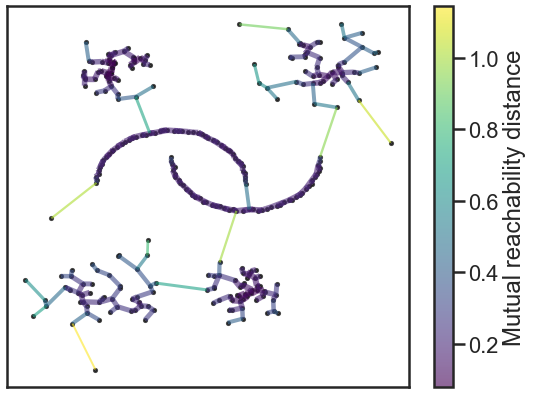

In [27]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis', edge_alpha=0.6, node_size=10, edge_linewidth=2)
# distance(mutual reachability)가 weight인 그래프

3. 이제 이를 바탕으로 ‘계층’을 만든다. weight를 점차 낮추면서, 하나씩 graph를 끊는다.(mutual reachability distance가 0.9인 지점의 연결선을 끊고, 0.8끊고, 0.7 끊고) 그후,만들어진 minimum spanning tree를 가장 가까운 거리부터 (우리가 아는 기존의 hierachy clustering처럼) 묶는다.

<AxesSubplot:ylabel='distance'>

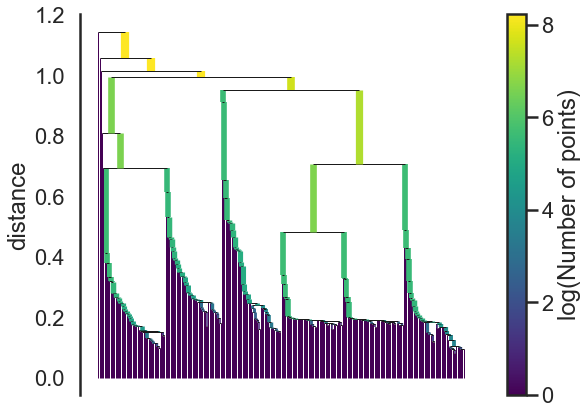

In [28]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)
# robust single linkage

4. hdbscan 알고리즘 사용
- 최종적으론 minimum size이상의 크기를 가진 component들이 남게 된다. 선의 너비는 그 component에 포함된 데이터의 수

<AxesSubplot:ylabel='$\\lambda$ value'>

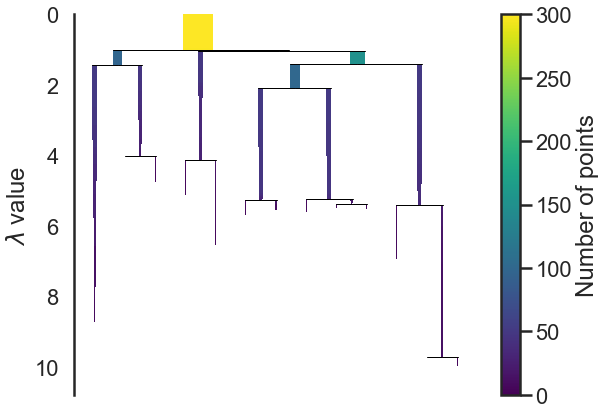

In [29]:
clusterer.condensed_tree_.plot()

<AxesSubplot:ylabel='$\\lambda$ value'>

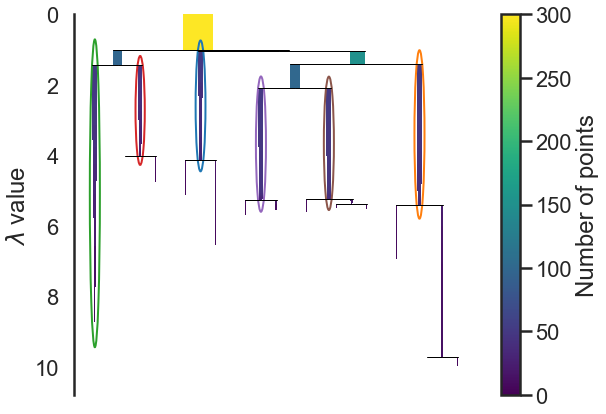

In [30]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

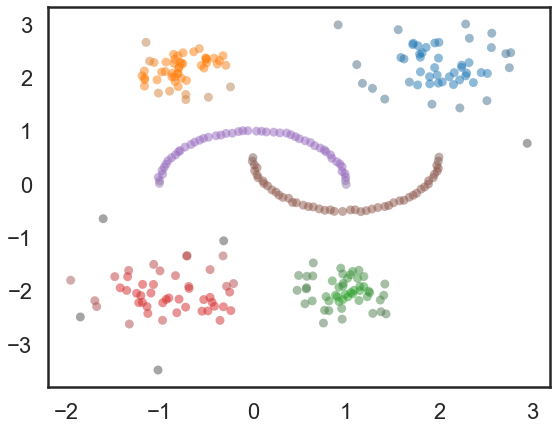

In [31]:
palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], sat)
                 if col>=0 else (0.3, 0.3, 0.3) for col, sat in
                 zip(clusterer.labels_, clusterer.probabilities_)]
plt.scatter(test_data.T[0], test_data.T[1], c=cluster_colors, **plot_kwds)

 - 각 점들을 클러스터별 색깔로 표시하되 속할확률이 작은 데이터들은 그 색을 desaturate하여 회색에 가깝게 표현

#### DBSCAN과 비교

In [32]:
from sklearn.cluster import DBSCAN
plt.rcParams["figure.figsize"] = [6, 5]
db = DBSCAN(eps=0.2, min_samples=10).fit(test_data)

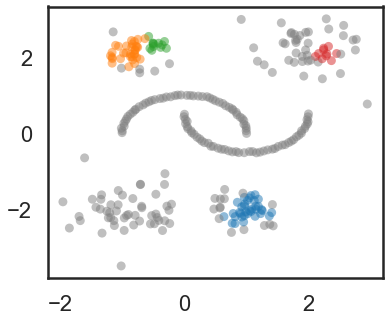

In [37]:
palette = sns.color_palette()
cluster_colors = [palette[col] 
                  if col>=0 else (0.5, 0.5, 0.5) for col in db.labels_]
plt.scatter(test_data.T[0], test_data.T[1], c=cluster_colors, **plot_kwds)

- DBSCAN은 epsilon안의 절대적인 데이터수를 따지기 때문에 타원형태가 더 유리하다.

In [38]:
# eps를 조정했을 때
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.35, min_samples=10).fit(test_data)

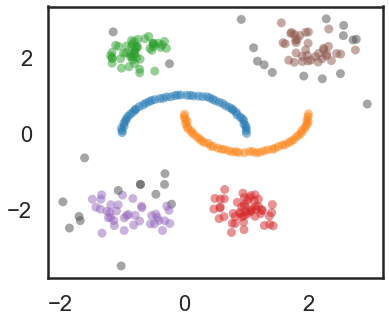

In [39]:
palette = sns.color_palette()
cluster_colors = [palette[col] 
                  if col>=0 else (0.3, 0.3, 0.3) for col in db.labels_]
plt.scatter(test_data.T[0], test_data.T[1], c=cluster_colors, **plot_kwds)

#### 다른 데이터로 비교(조금 더 극단적인 경우)

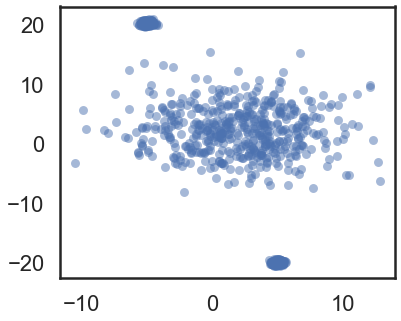

In [40]:
num = 500
blobs, _ = data.make_blobs(n_samples=num, centers=[(-5, 20.25), (5.0,-20.0)], cluster_std=0.25) 
blobs2, _ = data.make_blobs(n_samples=num, centers=[(2,2.25)], cluster_std=4)
test_data = np.vstack([blobs, blobs2])
plt.scatter(test_data.T[0], test_data.T[1], color='b', **plot_kwds)
plt.show()

#### DBSCAN의 경우

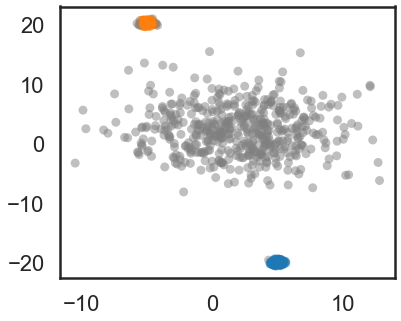

In [41]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2, min_samples=10).fit(test_data)
palette = sns.color_palette()
cluster_colors = [palette[col] 
                  if col>=0 else (0.5, 0.5, 0.5) for col in db.labels_]
plt.scatter(test_data.T[0], test_data.T[1], c=cluster_colors, **plot_kwds)

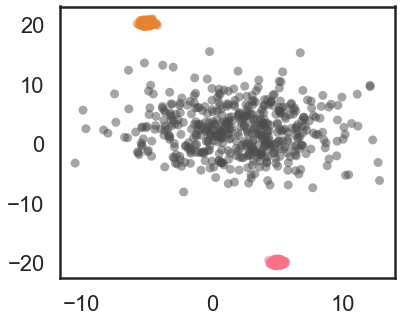

In [43]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.4, min_samples=10).fit(test_data)
palette = sns.color_palette("husl", 12)
cluster_colors = [palette[col] 
                  if col>=0 else (0.3, 0.3, 0.3) for col in db.labels_]
plt.scatter(test_data.T[0], test_data.T[1], c=cluster_colors, **plot_kwds)

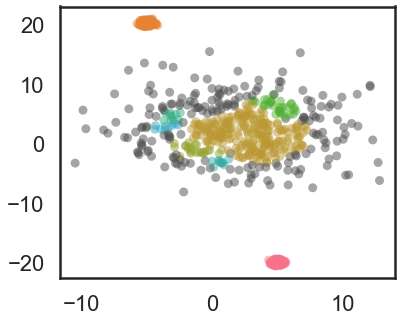

In [44]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=1, min_samples=10).fit(test_data)
palette = sns.color_palette("husl", 12)
cluster_colors = [palette[col] 
                  if col>=0 else (0.3, 0.3, 0.3) for col in db.labels_]
plt.scatter(test_data.T[0], test_data.T[1], c=cluster_colors, **plot_kwds)

#### HDBSCAN의 경우

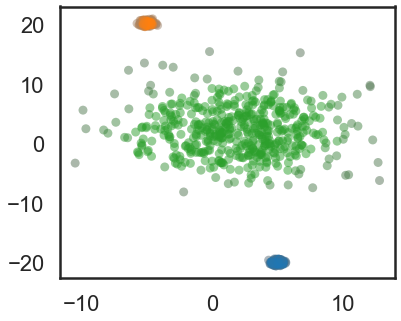

In [45]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
clusterer.fit(test_data)
palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], sat)
                 if col>=0 else (0.3, 0.3, 0.3) for col, sat in
                 zip(clusterer.labels_, clusterer.probabilities_)]
plt.scatter(test_data.T[0], test_data.T[1], c=cluster_colors, **plot_kwds)

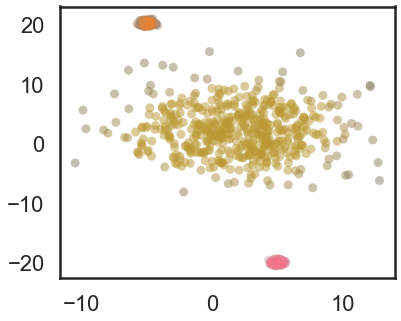

In [46]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
clusterer.fit(test_data)
palette = sns.color_palette("husl", 12)
cluster_colors = [sns.desaturate(palette[col], sat)
                 if col>=0 else (0.3, 0.3, 0.3) for col, sat in
                 zip(clusterer.labels_, clusterer.probabilities_)]
plt.scatter(test_data.T[0], test_data.T[1], c=cluster_colors, **plot_kwds)

- 서로 다른 두 parameter의 경우에서, 모두 variable dense를 잡아내었다.